# Détecteur de spam AT&T

## 1. Charger, nettoyer les données

In [1]:
import chardet

import pandas as pd
import html
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

In [2]:
with open('/Users/maurice/Documents/certification/bloc_4_Deep_learning/spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [3]:
data = pd.read_csv('/Users/maurice/Documents/certification/bloc_4_Deep_learning/spam.csv')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# regarder les colonnes Nan

print(f"Colonne Unnamed: 2:", data['Unnamed: 2'].isna().all())
print(f"Colonne Unnamed: 3:", data['Unnamed: 3'].isna().all())
print(f"Colonne Unnamed: 4:", data['Unnamed: 4'].isna().all())

Colonne Unnamed: 2: False
Colonne Unnamed: 3: False
Colonne Unnamed: 4: False


In [5]:
# mauvais encodage et mauvaise interprétation des "". 

for col in ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']:
    if col in data.columns:
        print(f"Valeurs non-NaN dans la colonne '{col}':")
        print(data[col].dropna().head())

Valeurs non-NaN dans la colonne 'Unnamed: 2':
95                                           PO Box 5249
281     the person is definitely special for u..... B...
444     HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...
671     wanted to say hi. HI!!!\" Stop? Send STOP to ...
710      this wont even start........ Datz confidence.."
Name: Unnamed: 2, dtype: object
Valeurs non-NaN dans la colonne 'Unnamed: 3':
95                          MK17 92H. 450Ppw 16"
281                             why to miss them
899                         MK17 92H. 450Ppw 16"
1038                                          GE
2170    U NO THECD ISV.IMPORTANT TOME 4 2MORO\""
Name: Unnamed: 3, dtype: object
Valeurs non-NaN dans la colonne 'Unnamed: 4':
281                         just Keep-in-touch\" gdeve.."
1038                                              GNT:-)"
2255     Never comfort me with a lie\" gud ni8 and swe...
3525                  CALL 2MWEN IM BK FRMCLOUD 9! J X\""
4668      one day these two will bec

In [6]:
data.iloc[281]

v1                                                          ham
v2                                          \Wen u miss someone
Unnamed: 2     the person is definitely special for u..... B...
Unnamed: 3                                     why to miss them
Unnamed: 4                        just Keep-in-touch\" gdeve.."
Name: 281, dtype: object

In [7]:
data['SMS'] = data[['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']].fillna('').agg(' '.join, axis=1)
pd.options.display.max_colwidth = None
data.iloc[281]

v1                                                                                                                                                          ham
v2                                                                                                                                          \Wen u miss someone
Unnamed: 2                                                                          the person is definitely special for u..... But if the person is so special
Unnamed: 3                                                                                                                                     why to miss them
Unnamed: 4                                                                                                                        just Keep-in-touch\" gdeve.."
SMS           \Wen u miss someone  the person is definitely special for u..... But if the person is so special  why to miss them  just Keep-in-touch\" gdeve.."
Name: 281, dtype: object

In [8]:
data = data.drop(columns=['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
data.columns = ['target', 'sms']
data

,target,sms
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the �750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [9]:
# mauvais encodage des valeurs html

data.iloc[5559]

target                                                                      ham
sms       if you aren't here in the next  &lt;#&gt;  hours imma flip my shit   
Name: 5559, dtype: object

In [10]:
data['sms'] = data['sms'].apply(html.unescape)


In [11]:
data.iloc[5559]

target                                                                ham
sms       if you aren't here in the next  <#>  hours imma flip my shit   
Name: 5559, dtype: object

In [12]:
# identification des valeurs �

data[data['sms'].str.contains('�', na=False)]

,target,sms
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv"
8,spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
12,spam,"URGENT! You have won a 1 week FREE membership in our �100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"
18,ham,Fine if that��s the way u feel. That��s the way its gota b
21,ham,I���m going to try for 2 months ha ha only joking
...,...,...
5511,ham,"It���s reassuring, in this crazy world."
5524,spam,You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p p�3.99
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O �250 3 WANT �800
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the �750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."


In [13]:
# remplacer les valeurs �

data['sms'] = data['sms'].str.replace('���', "'", regex=False)
data['sms'] = data['sms'].str.replace('��s', "'s", regex=False)
data['sms'] = data['sms'].str.replace('��', "I", regex=False)
data['sms'] = data['sms'].str.replace('�_', "you", regex=False)
data['sms'] = data['sms'].str.replace('�', "£", regex=False)

In [14]:
data[data['sms'].str.contains('�', na=False)]

,target,sms


In [15]:
# exporter le dataset clean

data.to_csv('spam_clean.csv', index=False, encoding='utf-8')

## 2. Exploration des données et visualisation

In [16]:
data['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

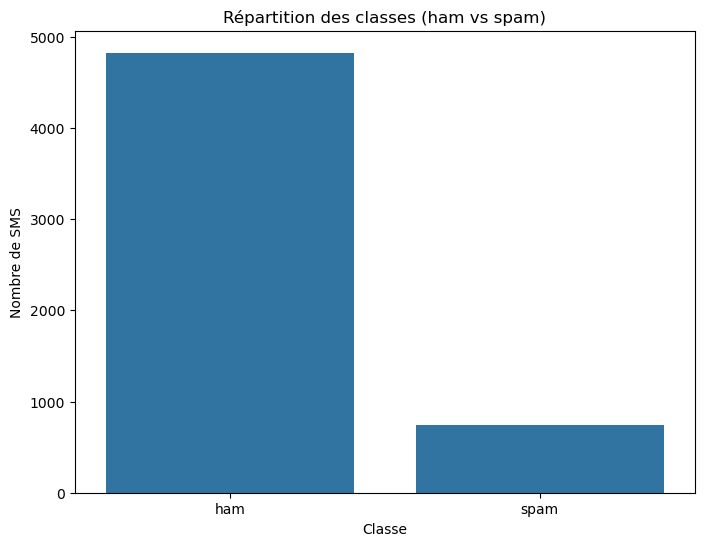

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title("Répartition des classes (ham vs spam)")
plt.xlabel("Classe")
plt.ylabel("Nombre de SMS")
plt.show()


Longueur moyenne des SMS par classe :
target
ham      74.142383
spam    141.701473
Name: length, dtype: float64


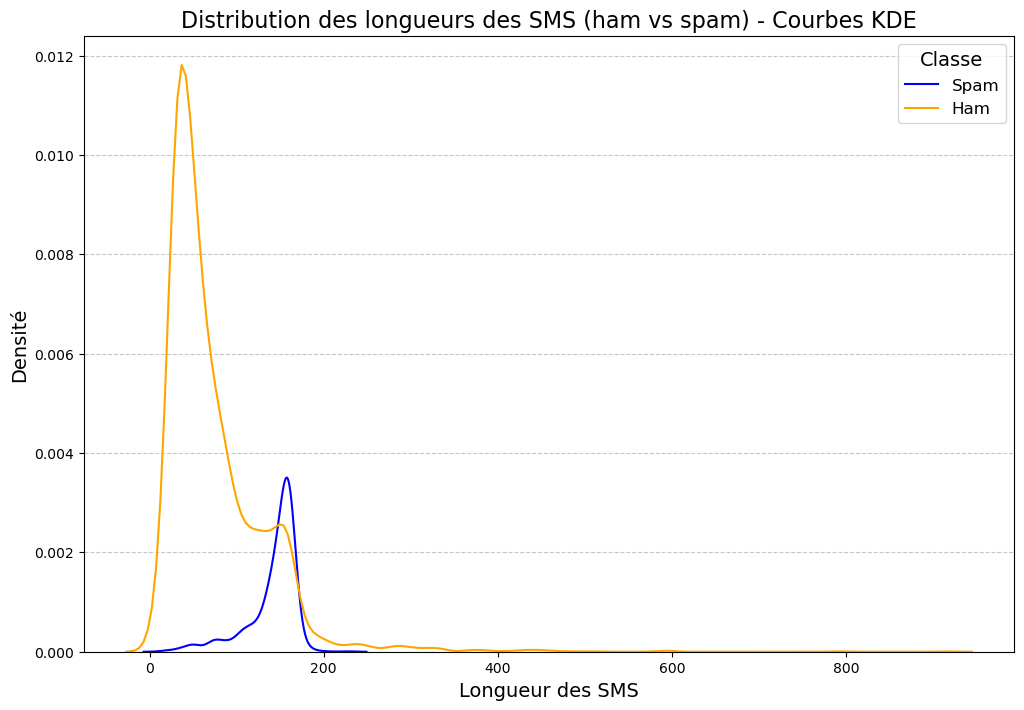

In [18]:
data['length'] = data['sms'].str.len()

length_stats = data.groupby('target')['length'].mean()
print("Longueur moyenne des SMS par classe :")
print(length_stats)

plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, x='length', hue='target', palette=['orange', 'blue'], fill=False)
plt.title("Distribution des longueurs des SMS (ham vs spam) - Courbes KDE", fontsize=16)
plt.xlabel("Longueur des SMS", fontsize=14)
plt.ylabel("Densité", fontsize=14)
# Activer la grille pour l'axe Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Classe", labels=["Spam", "Ham"], fontsize=12, title_fontsize=14)

plt.show()

## 3. Prétraitement SMS

In [19]:
#!python -m spacy download en_core_web_sm -q

In [20]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [21]:
from spacy.lang.en.stop_words import STOP_WORDS

In [22]:
data["sms_clean"] = data["sms"].apply(lambda x: ''.join(ch for ch in x if ch.isalnum() or ch == " "))
data["sms_clean"] = data["sms_clean"].apply(lambda x: " ".join(x.split()).lower().strip())
data["sms_clean"] = data["sms_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in nlp.Defaults.stop_words) and (token.text not in nlp.Defaults.stop_words)]))
data['target'] = data['target'].apply(lambda x: 1 if x == "spam" else 0).astype(int)

data

,target,sms,length,sms_clean
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",114,jurong point crazy available bugis n great world la e buffet cine amore wat
1,0,Ok lar... Joking wif u oni...,32,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,158,free entry 2 wkly comp win fa cup final tkts 21st 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s
3,0,U dun say so early hor... U c already then say...,52,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives around here though",64,nah think usf live
...,...,...,...,...
5567,1,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",163,2nd time try 2 contact u u win 750 pound prize 2 claim easy 087187272008 now1 10p minute btnationalrate
5568,0,Will you b going to esplanade fr home?,41,b esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other suggestions?",60,pity mood soany suggestion
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,128,guy bitching act like d interested buy week free


In [23]:
import tensorflow as tf 

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data.sms_clean)
data["sms_encoded"] = tokenizer.texts_to_sequences(data.sms_clean)

data

,target,sms,length,sms_clean,sms_encoded
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",114,jurong point crazy available bugis n great world la e buffet cine amore wat,"[3604, 233, 446, 462, 936, 35, 50, 208, 937, 78, 2343, 938, 3605, 57]"
1,0,Ok lar... Joking wif u oni...,32,ok lar joking wif u oni,"[10, 194, 3606, 291, 2, 1441]"
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,158,free entry 2 wkly comp win fa cup final tkts 21st 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,"[12, 300, 4, 534, 657, 32, 1442, 842, 427, 1443, 1753, 1754, 20, 1442, 1444, 157, 300, 2344, 24, 2345, 234, 2346]"
3,0,U dun say so early hor... U c already then say...,52,u dun early hor u c,"[2, 123, 147, 2347, 2, 84]"
4,0,"Nah I don't think he goes to usf, he lives around here though",64,nah think usf live,"[704, 22, 658, 128]"
...,...,...,...,...,...
5567,1,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",163,2nd time try 2 contact u u win 750 pound prize 2 claim easy 087187272008 now1 10p minute btnationalrate,"[266, 18, 47, 4, 91, 2, 2, 32, 420, 279, 68, 4, 48, 218, 8202, 8203, 546, 137, 929]"
5568,0,Will you b going to esplanade fr home?,41,b esplanade fr home,"[106, 1520, 575, 25]"
5569,0,"Pity, * was in mood for that. So...any other suggestions?",60,pity mood soany suggestion,"[8204, 932, 8205, 3600]"
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,128,guy bitching act like d interested buy week free,"[111, 8206, 1335, 14, 29, 1106, 86, 38, 12]"


## EMBEDDING MODEL

In [24]:
sms_pad = tf.keras.preprocessing.sequence.pad_sequences(data.sms_encoded, padding="post")

data['sms_pad'] = sms_pad.tolist()
data

,target,sms,length,sms_clean,sms_encoded,sms_pad
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",114,jurong point crazy available bugis n great world la e buffet cine amore wat,"[3604, 233, 446, 462, 936, 35, 50, 208, 937, 78, 2343, 938, 3605, 57]","[3604, 233, 446, 462, 936, 35, 50, 208, 937, 78, 2343, 938, 3605, 57, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,0,Ok lar... Joking wif u oni...,32,ok lar joking wif u oni,"[10, 194, 3606, 291, 2, 1441]","[10, 194, 3606, 291, 2, 1441, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,158,free entry 2 wkly comp win fa cup final tkts 21st 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,"[12, 300, 4, 534, 657, 32, 1442, 842, 427, 1443, 1753, 1754, 20, 1442, 1444, 157, 300, 2344, 24, 2345, 234, 2346]","[12, 300, 4, 534, 657, 32, 1442, 842, 427, 1443, 1753, 1754, 20, 1442, 1444, 157, 300, 2344, 24, 2345, 234, 2346, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,0,U dun say so early hor... U c already then say...,52,u dun early hor u c,"[2, 123, 147, 2347, 2, 84]","[2, 123, 147, 2347, 2, 84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,0,"Nah I don't think he goes to usf, he lives around here though",64,nah think usf live,"[704, 22, 658, 128]","[704, 22, 658, 128, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...
5567,1,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",163,2nd time try 2 contact u u win 750 pound prize 2 claim easy 087187272008 now1 10p minute btnationalrate,"[266, 18, 47, 4, 91, 2, 2, 32, 420, 279, 68, 4, 48, 218, 8202, 8203, 546, 137, 929]","[266, 18, 47, 4, 91, 2, 2, 32, 420, 279, 68, 4, 48, 218, 8202, 8203, 546, 137, 929, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5568,0,Will you b going to esplanade fr home?,41,b esplanade fr home,"[106, 1520, 575, 25]","[106, 1520, 575, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5569,0,"Pity, * was in mood for that. So...any other suggestions?",60,pity mood soany suggestion,"[8204, 932, 8205, 3600]","[8204, 932, 8205, 3600, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,128,guy bitching act like d interested buy week free,"[111, 8206, 1335, 14, 29, 1106, 86, 38, 12]","[111, 8206, 1335, 14, 29, 1106, 86, 38, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [25]:
sms_pad.shape

(5572, 72)

In [26]:
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(
    sms_pad,
    data['target'], 
    test_size=0.3,
    random_state=42,
    stratify=data['target']
)

In [27]:
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

train_batch = train.shuffle(len(train)).batch(8)
val_batch = val.shuffle(len(val)).batch(8)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.num_words+1, output_dim=8,input_length=sms_pad.shape[1], name="embedding"),
    tf.keras.layers.GlobalAveragePooling1D(),                     
    tf.keras.layers.Dense(8, activation='relu'),            
    tf.keras.layers.Dense(1, activation='sigmoid')              
])
   

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 8)          │        80,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 8)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,269 (938.55 KB)

 Trainable params: 80,089 (312.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,180 (625.71 KB)

In [30]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),    
    loss=tf.keras.losses.BinaryCrossentropy(), 
    metrics=['accuracy']                    
)


In [31]:
history = model.fit(train_batch, 
                    epochs=20, 
                    validation_data=val_batch)

Epoch 1/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.8451 - loss: 0.4236 - val_accuracy: 0.8660 - val_loss: 0.3605
Epoch 2/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.8735 - loss: 0.3441 - val_accuracy: 0.8660 - val_loss: 0.3495
Epoch 3/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.8635 - loss: 0.3509 - val_accuracy: 0.8660 - val_loss: 0.3318
Epoch 4/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8632 - loss: 0.3215 - val_accuracy: 0.8660 - val_loss: 0.2877
Epoch 5/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8840 - loss: 0.2475 - val_accuracy: 0.9187 - val_loss: 0.1982
Epoch 6/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9416 - loss: 0.1621 - val_accuracy: 0.9557 - val_loss: 0.1300
Epoch 7/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.9698 - loss: 0.1051 - val_accuracy: 0.9629 - val_loss: 0.1040
Epoch 8/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.9777 - loss: 0.0758 - 

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step


2025-01-08 00:03:10.765010: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


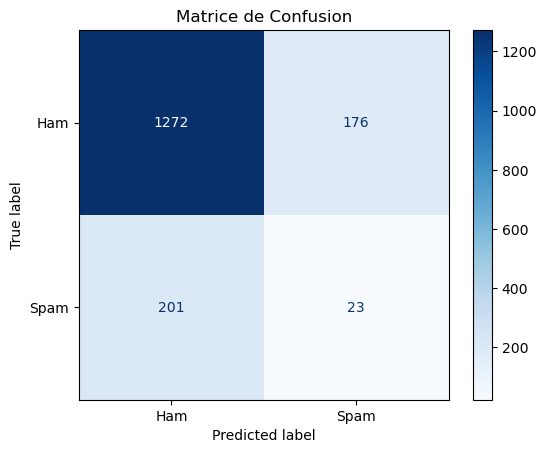

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions sur l'ensemble de validation
y_pred = model.predict(val_batch)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convertir probabilités en 0 ou 1

# Récupérer les vraies classes
y_true = np.concatenate([y for x, y in val_batch], axis=0)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()

In [33]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Prédictions sur l'ensemble de validation
y_pred = model.predict(val_batch)
y_pred_classes = (y_pred > 0.5).astype(int).flatten() 


# Calcul des métriques
print("Classification Report :\n")
print(classification_report(y_true, y_pred_classes, target_names=["Ham", "Spam"]))

# F1-Score
f1 = f1_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)

print(f"F1-Score: {f1:.4f}")
print(f"Précision: {precision:.4f}")
print(f"Rappel: {recall:.4f}")

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
Classification Report :

              precision    recall  f1-score   support

         Ham       0.87      0.89      0.88      1448
        Spam       0.18      0.16      0.17       224

    accuracy                           0.79      1672
   macro avg       0.53      0.52      0.53      1672
weighted avg       0.78      0.79      0.78      1672

F1-Score: 0.1702
Précision: 0.1809
Rappel: 0.1607


## EMBEDING MODEL Word2vec